In [12]:
import skrf as rf
import matplotlib.pyplot as plt
rf.stylely()

In [28]:
Z_0 = 50
Z_L = 75
theta = 0

# the necessary Frequency description
freq = rf.Frequency(start=0, stop=25, unit='GHz', npoints=25)

# The combination of a transmission line + a load can be created
# using the convenience delay_load method
# important: all the Network must have the parameter "name" defined
tline_media = rf.DefinedGammaZ0(freq, z0=Z_0)
delay_load = tline_media.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), theta, unit='deg', name='delay_load')

# the input port of the circuit is defined with the Circuit.Port method
# In order for Circuit() to recognize the Network as a "port", its name must contains the word 'port':
port1 = rf.Circuit.Port(freq, 'port1', z0=Z_0)

# connexion list
cnx = [
    [(port1, 0), (delay_load, 0)]
]
# building the circuit
cir = rf.Circuit(cnx)

# getting the resulting Network from the 'network' parameter:
ntw = cir.network
print(ntw)

1-Port Network: '',  0.0-25.0 GHz, 25 pts, z0=[50.+0.j]


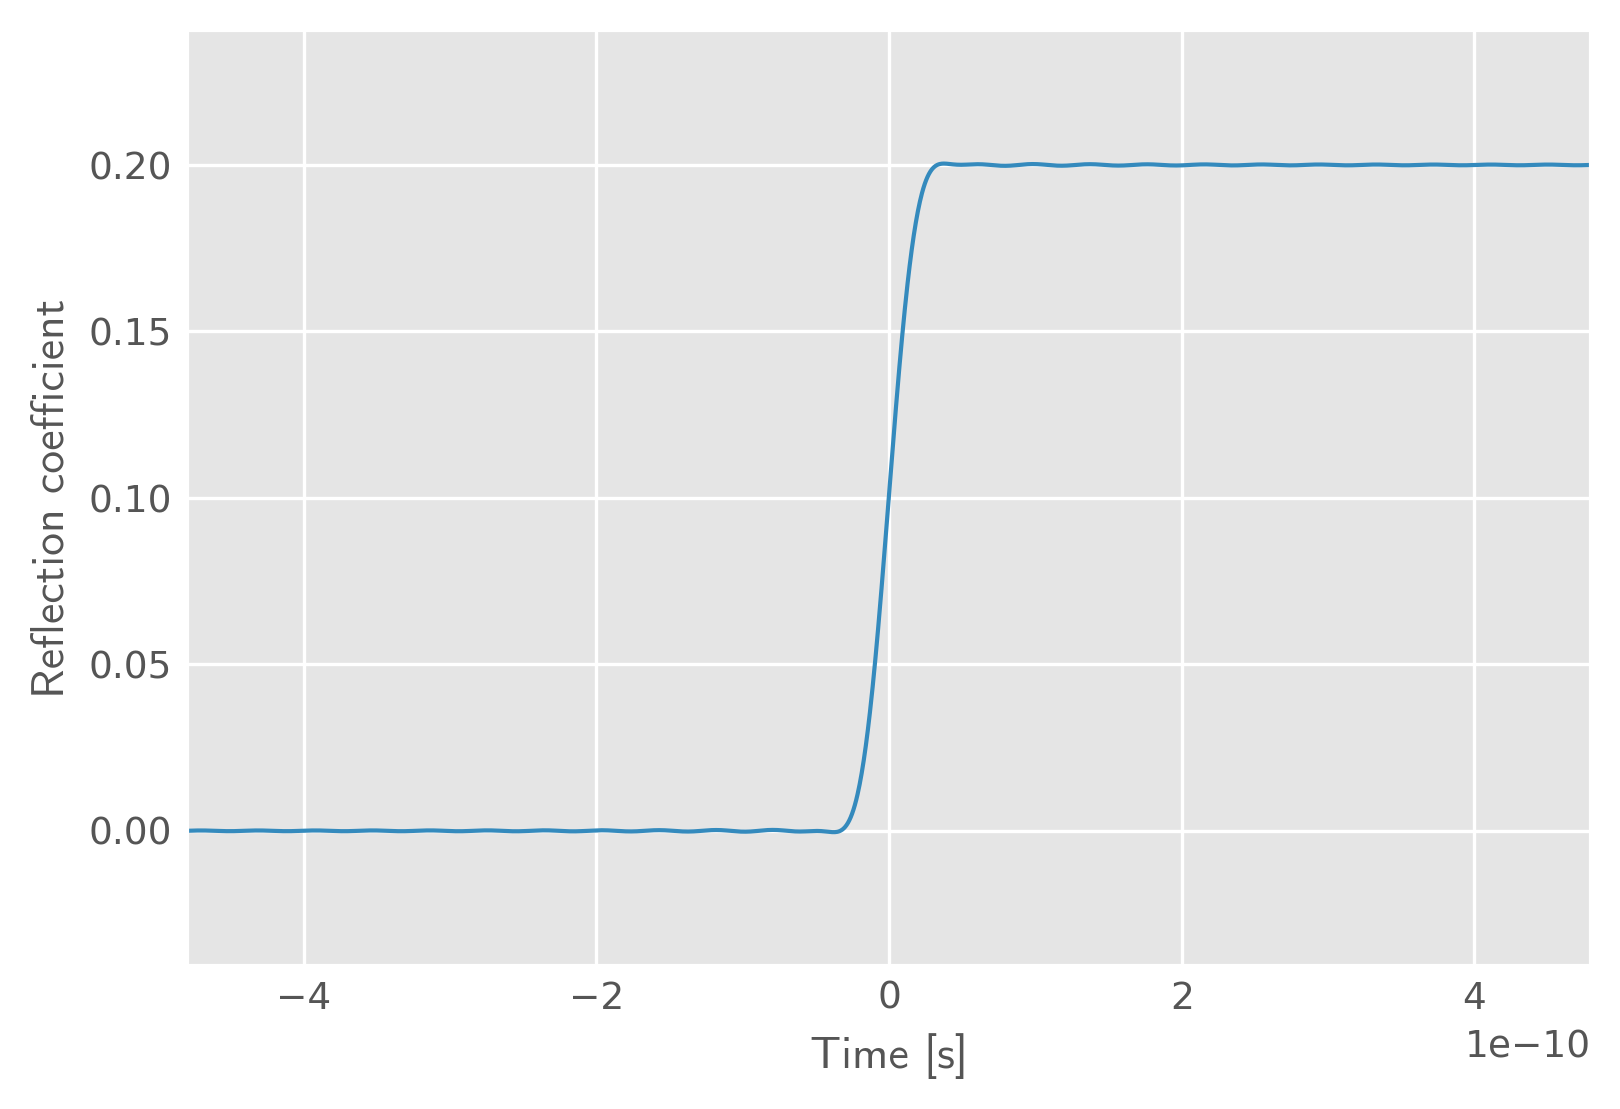

In [29]:
imp_resp = ntw.step_response()

cmufont = {'fontname':'CMU Sans Serif'}
plt.figure(dpi=300)
plt.plot(imp_resp[0],imp_resp[1])
plt.xlabel('Time [s]',**cmufont)
plt.ylabel('Reflection coefficient',**cmufont)
plt.show()
